MACHINE LOVE NUMBERS, HUMEN LIKE PICTURES.

> https://www.learnpytorch.io/01_pytorch_workflow/

In [160]:
import torch
import numpy as np
from torch import nn 
import matplotlib.pyplot as plt

torch.__version__

'1.12.0+cpu'

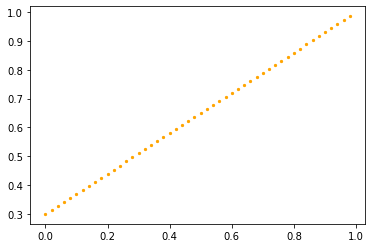

In [161]:
# create parameters
weight = 0.7
bias = 0.3

# creat data
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1) # X must be 2 dimention
y = weight*X + bias

plt.scatter(X, y, s=5, color='orange');

(40, 10)

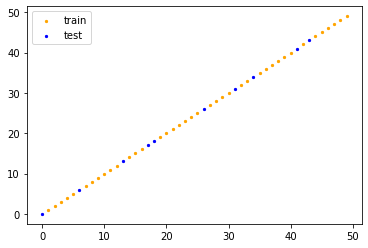

In [162]:
train_size = int(0.8 * len(X))
random_index = np.random.permutation(len(X))
X_train, y_train = random_index[:train_size], random_index[:train_size]
X_test, y_test = random_index[train_size:], random_index[train_size:]

X_train, y_train = torch.from_numpy(X_train), torch.from_numpy(y_train)
X_test, y_test = torch.from_numpy(X_test), torch.from_numpy(y_test)

plt.scatter(X_train, y_train, s=5, color='orange', label='train')
plt.scatter(X_test, y_test, s=5, color='blue', label='test')
plt.legend();
len(X_train), len(X_test)

Let's bulid linear regression model.

In [163]:
class LinearRegessionModel(nn.Module) :
    def __init__(self) :
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float)) # start with random number and can learn by gradien decest (autograd)
        self.bias = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))
    
    # forward part
    def forward(self, x: torch.Tensor) -> torch.Tensor :
        return self.weights * x + self.bias  #just simple linear formular (y=mx+b)

In [164]:
torch.manual_seed(42)
linear_model = LinearRegessionModel()
linear_model.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

making prediction by the randomize weights and bias

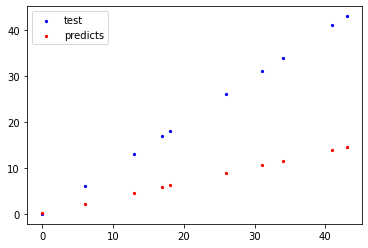

In [165]:
with torch.inference_mode() :
    y_preds = linear_model(X_test)

plt.scatter(X_test, y_test, s=5, color='blue', label='test')
plt.scatter(X_test, y_preds, s=5, color='red', label='predicts')
plt.legend();

> predicts really bad.

Let's train the 1st Model.

In [166]:
# create loss function
loss_fn = nn.L1Loss() # L1Loss is a MAE

# create the optimizer
optimizer = torch.optim.SGD(params=linear_model.parameters(),lr=0.002)

In [167]:
# trian the Model
epochs = 100
train_loss_ = []
test_loss_ = []
epoch_count = []

for epoch in range(epochs) :
    linear_model.train()
    
    # predict for each epoch (this use forward part)
    y_pred = linear_model(X_train)
    loss = loss_fn(y_pred, y_train)
    
    optimizer.zero_grad() # before do backpropragation
    # so that you do the parameter update correctly. Otherwise, 
    # the gradient would be a combination of the old gradient
    loss.backward()
    optimizer.step()

    linear_model.eval() # evaluate the model

    # prediction for every 10 epoch (validtion data: by this we use X_test)
    with torch.inference_mode() :
        test_pred = linear_model(X_test)
        test_loss = loss_fn(test_pred, y_test.type(torch.float)) # need to be same datatype

        if epoch % 10 == 0 :
            epoch_count.append(epoch) 
            train_loss_.append(loss.detach().numpy())
            test_loss_.append(test_loss.detach().numpy())
            print(f"Epoch: {epoch} | MAE Train Loss: {loss:.7f} | MAE Test Loss: {test_loss:.7f} ")

Epoch: 0 | MAE Train Loss: 16.3875999 | MAE Test Loss: 13.9447231 
Epoch: 10 | MAE Train Loss: 3.9674027 | MAE Test Loss: 2.5245256 
Epoch: 20 | MAE Train Loss: 0.7614262 | MAE Test Loss: 0.4601962 
Epoch: 30 | MAE Train Loss: 0.5847269 | MAE Test Loss: 0.6224163 
Epoch: 40 | MAE Train Loss: 0.4582353 | MAE Test Loss: 0.7385075 
Epoch: 50 | MAE Train Loss: 0.3820376 | MAE Test Loss: 0.8084046 
Epoch: 60 | MAE Train Loss: 0.3058406 | MAE Test Loss: 0.8783022 
Epoch: 70 | MAE Train Loss: 0.2296432 | MAE Test Loss: 0.9482005 
Epoch: 80 | MAE Train Loss: 0.1761586 | MAE Test Loss: 0.9972442 
Epoch: 90 | MAE Train Loss: 0.1378161 | MAE Test Loss: 1.0323883 


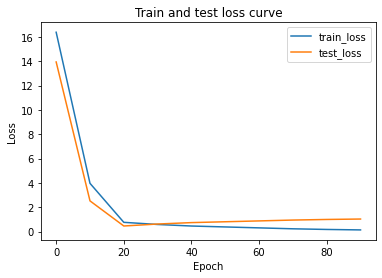

In [168]:
plt.plot(epoch_count, train_loss_, label='train_loss')
plt.plot(epoch_count, test_loss_, label='test_loss')
plt.title('Train and test loss curve')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend();

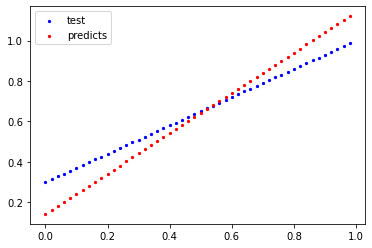

In [175]:
# Set the model in evaluation mode
linear_model.eval()

with torch.inference_mode() :
    y_preds = linear_model(X)

plt.scatter(X, y, s=5, color='blue', label='test')
plt.scatter(X, y_preds, s=5, color='red', label='predicts')
plt.legend();

In [170]:
# Find our model's learned parameters
print("The model learned the following values for weights and bias:")
print(linear_model.state_dict())
print("\nAnd the original values for weights and bias are:")
print(f"weights: {weight}, bias: {bias}")

The model learned the following values for weights and bias:
OrderedDict([('weights', tensor([0.9983])), ('bias', tensor([0.1420]))])

And the original values for weights and bias are:
weights: 0.7, bias: 0.3


Saving a PyTorch model's

In [171]:
from pathlib import Path

MODEL_PATH = Path('save_model')
MODEL_PATH.mkdir(parents=True, exist_ok=True)

MODEL_NAME = '0.1_pytorch_wf_model_0.pth'
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

print(f'save model to : {MODEL_SAVE_PATH}')
torch.save(linear_model.state_dict(), f=MODEL_SAVE_PATH)

save model to : save_model\0.1_pytorch_wf_model_0.pth


Load a saved model's

In [172]:
loaded_model = LinearRegessionModel()
loaded_model.load_state_dict(torch.load(f=MODEL_SAVE_PATH)) # like load weights

<All keys matched successfully>

In [173]:
loaded_model.state_dict()

OrderedDict([('weights', tensor([0.9983])), ('bias', tensor([0.1420]))])